In [34]:
# Εγκατάσταση των βιβλιοθηκών numpy (για αριθμητικούς υπολογισμούς), pandas (για επεξεργασία δεδομένων),
# matplotlib και seaborn (για οπτικοποίηση δεδομένων), scikit-learn (για machine learning) και torch (για deep learning)
# Οι βιβλιοθήκες είναι ήδη εγκατεστημένες στο περιβάλλον και δεν χρειάζεται να τις ξαναεγκαταστήσουμε.
# Αν κάποιος τρέξει το notebook σε νέο περιβάλλον, θα χρειαστεί να εκτελέσει την εξής εντολή για να εγκαταστήσει τις βιβλιοθήκες:
# !pip install numpy pandas matplotlib seaborn scikit-learn torch


In [35]:
# Εισαγωγή των απαραίτητων βιβλιοθηκών

import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, roc_curve, auc
)
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [36]:
# Φορτώνουμε τα δεδομένα από το αρχείο που αποθηκεύσαμε

data = np.load('train_test_images_normalized_images.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
class_names = data['class_names']  # Φόρτωση των ονομάτων των κατηγοριών

# Εκτύπωση των σχημάτων και των ονομάτων των κατηγοριών
print(f"Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: {X_train.shape}, ετικέτες: {y_train.shape}")
print(f"Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: {X_test.shape}, ετικέτες: {y_test.shape}")
print(f"Ονόματα Κατηγοριών: {class_names}")

Φορτώθηκε το Σχήμα Συνόλου Εκπαίδευσης: (2800, 4096), ετικέτες: (2800,)
Φορτώθηκε το Σχήμα Συνόλου Δοκιμής: (1200, 4096), ετικέτες: (1200,)
Ονόματα Κατηγοριών: ['BreastMRI' 'ChestCT' 'CXR' 'Hand']


In [37]:
# Logistic Regression χωρίς PCA 
# Πρώτα, εκπαιδεύουμε με τα δεδομένα χωρίς να κάνουμε μείωση διαστάσεων και αξιολογούμε την απόδοση ώστε να έχουμε μέτρο σύγκρισης.

# Flatten τα δεδομένα για το Training και Test Set
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flattened)  # Εκπαίδευση και μετασχηματισμός του training set
X_test_std = scaler.transform(X_test_flattened)  # Μόνο μετασχηματισμός του test set

# Εκπαίδευση Logistic Regression πάνω στα δεδομένα του Training Set
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_std, y_train)  # Εκπαίδευση με τα δεδομένα του Training Set

# Προβλέψεις για το Test Set
y_pred = clf.predict(X_test_std)

# Εκτύπωση Test Accuracy
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Εκτύπωση Classification Report για το Test Set
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Test Accuracy: 0.9925

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       300
     ChestCT       0.99      0.99      0.99       300
         CXR       0.99      1.00      1.00       300
        Hand       0.99      0.98      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



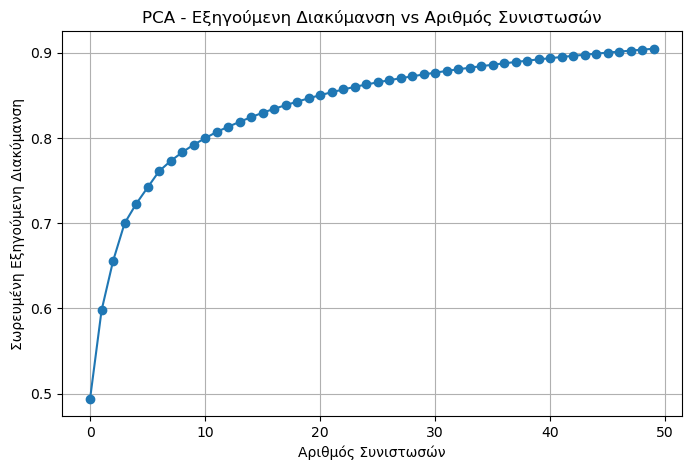

Αρχικό σχήμα: (2800, 4096)
Σχήμα μετά το PCA: (2800, 50)


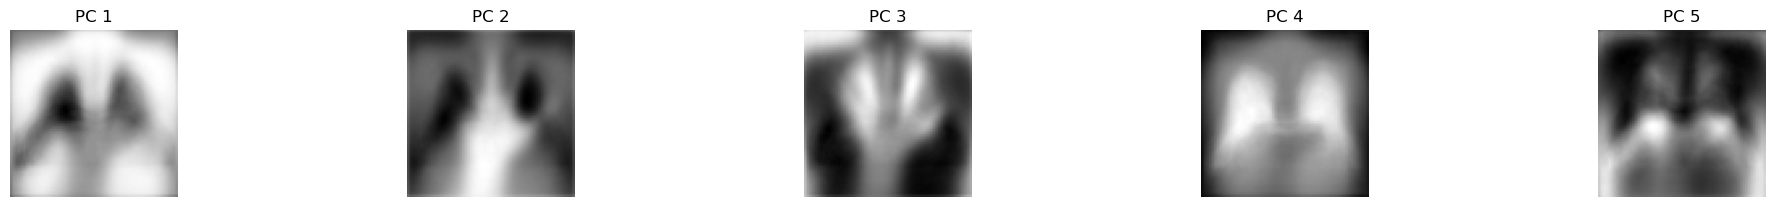

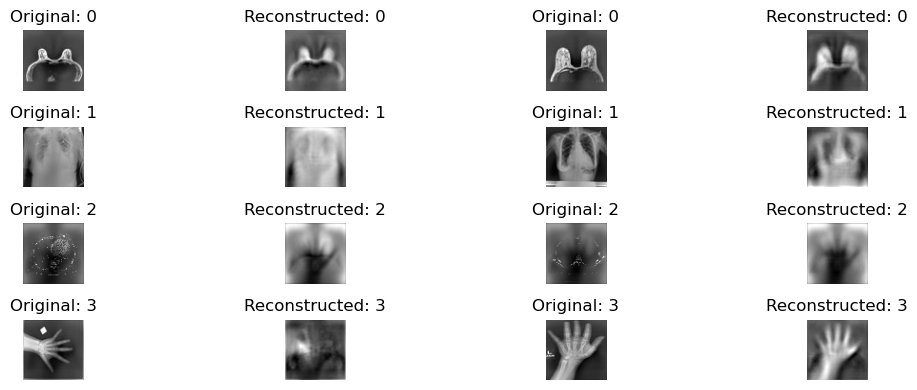

In [38]:
# Flattening (ξεδιπλώνουμε) τα δεδομένα εικόνας για το PCA
num_samples = X_train.shape[0]  # Αριθμός δείγματων στο training set
flattened_images = X_train.reshape(num_samples, -1)  # Μετατρέπουμε τις εικόνες σε μονοδιάστατους πίνακες (1D array)

# Τυποποίηση (Standardization) των δεδομένων
scaler = StandardScaler()  # Δημιουργούμε το αντικείμενο StandardScaler
flattened_images_std = scaler.fit_transform(flattened_images)  # Τυποποιούμε τα δεδομένα (μηδενική μέση τιμή και τυπική απόκλιση 1)

# Εφαρμογή PCA (Ανάλυση Κύριων Συνιστωσών)
# Δεν πρέπει να εφαρμόζουμε PCA και στα δεδομένα του test set πριν την εκπαίδευση του μοντέλου,
# καθώς αυτό θα "χαλάσει" την αξιολόγηση του μοντέλου (θα χρησιμοποιήσουμε πληροφορίες από το test set).
n_components = 50  # Ορίζουμε τον αριθμό των κύριων συνιστωσών που θέλουμε να κρατήσουμε
pca = PCA(n_components=n_components)  # Δημιουργούμε το αντικείμενο PCA με τις επιθυμητές συνιστώσες
principal_components = pca.fit_transform(flattened_images_std)  # Εκτελούμε PCA για να μειώσουμε τις διαστάσεις

# Γραφική αναπαράσταση της εξηγούμενης διακύμανσης ανά συνιστώσα
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')  # Σωρευμένη εξηγούμενη διακύμανση
plt.xlabel('Αριθμός Συνιστωσών')
plt.ylabel('Σωρευμένη Εξηγούμενη Διακύμανση')
plt.title('PCA - Εξηγούμενη Διακύμανση vs Αριθμός Συνιστωσών')
plt.grid(True)
plt.show()

# Εκτύπωση των σχημάτων πριν και μετά το PCA
print(f"Αρχικό σχήμα: {flattened_images.shape}")  # Σχήμα πριν το PCA
print(f"Σχήμα μετά το PCA: {principal_components.shape}")  # Σχήμα μετά το PCA (λιγότερες συνιστώσες)

# Απεικόνιση των πρώτων 5 κύριων συνιστωσών
plt.figure(figsize=(20, 4))
for i in range(5):  # Για τις πρώτες 5 συνιστώσες
    plt.subplot(2, 5, i + 1)
    # Αναδιαμορφώνουμε την κύρια συνιστώσα σε 2D (64x64), το ίδιο σχήμα με τις αρχικές εικόνες
    component = pca.components_[i].reshape(64, 64)  # Εφόσον οι εικόνες είναι 64x64
    plt.imshow(component, cmap='gray')  # Απεικόνιση της συνιστώσας
    plt.title(f'PC {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Ανάκτηση των εικόνων από τις κύριες συνιστώσες (Inverse Transform)
reconstructed = pca.inverse_transform(principal_components)  # Ανάκτηση των αρχικών δεδομένων από τις συνιστώσες
reconstructed_images = scaler.inverse_transform(reconstructed)  # Ανάκτηση των δεδομένων στην αρχική κλίμακα
reconstructed_images = reconstructed_images.reshape(X_train.shape)  # Διαμορφώνουμε ξανά τις εικόνες στο αρχικό τους σχήμα

# Απεικόνιση 2 εικόνων ανά κατηγορία: αρχικές και ανακατασκευασμένες
unique_classes = np.unique(y_train)  # Εύρεση μοναδικών κατηγοριών
images_per_class = 2  # Αριθμός εικόνων ανά κατηγορία που θα απεικονίσουμε

plt.figure(figsize=(10, 4))  # Αυξάνουμε το μέγεθος της εικόνας για καλύτερη απεικόνιση
plot_idx = 1  # Δείκτης για την τοποθέτηση εικόνας

# Για κάθε κατηγορία
for class_label in unique_classes:
    class_indices = np.where(y_train == class_label)[0][:images_per_class]  # Ευρεση των δειγμάτων για την κατηγορία αυτή
    for i, idx in enumerate(class_indices):
        # Αρχική εικόνα (αναδιαμόρφωση σε 2D 64x64)
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(X_train[idx].reshape(64, 64), cmap='gray')  # Αναδιαμορφώνουμε σε 64x64
        plt.title(f"Original: {class_label}")
        plt.axis('off')
        plot_idx += 1

        # Ανακατασκευασμένη εικόνα (αναδιαμόρφωση σε 2D 64x64)
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(reconstructed_images[idx].reshape(64, 64), cmap='gray')  # Αναδιαμορφώνουμε σε 64x64
        plt.title(f"Reconstructed: {class_label}")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Ρυθμίσεις για τον χώρο μεταξύ των εικόνων
plt.show()




In [40]:
# Logistic Regreression με PCA

# Μετατρέπουμε το Test Set σε επίπεδη μορφή (Flatten) για να το χρησιμοποιήσουμε με PCA
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Εφαρμόζουμε τον StandardScaler στο Test Set με τον ίδιο scaler που εφαρμόσαμε στο Training Set
X_test_std = scaler.transform(X_test_flat)  # Χρησιμοποιούμε το transform, όχι το fit_transform

# Εφαρμόζουμε το PCA για να μετασχηματίσουμε το Test Set χρησιμοποιώντας το PCA που έχει εκπαιδευτεί με το Training Set
X_test_pca = pca.transform(X_test_std)  # Χρησιμοποιούμε το transform, όχι το fit_transform

# Το PCA που έχει ήδη υπολογιστεί για το Training Set το κρατάμε για να το χρησιμοποιήσουμε
X_train_pca = principal_components  # Εδώ είναι το PCA του Training Set (το οποίο ήδη υπολογίστηκε)

# Εκπαιδεύουμε τον ταξινομητή Logistic Regression με τα δεδομένα που έχουν μειωθεί σε διάσταση με το PCA
clf = LogisticRegression(
    solver='liblinear',  # Επιλέγουμε το "liblinear" για την επίλυση
    max_iter=1000,  # Μέγιστος αριθμός επαναλήψεων για να εξασφαλίσουμε την σύγκλιση
    random_state=42  # Ορίζουμε τυχαίο state για αναπαραγωγιμότητα
)

# Εκπαιδεύουμε το μοντέλο με τα PCA μειωμένα δεδομένα του Training Set
clf.fit(X_train_pca, y_train)

# Κάνουμε προβλέψεις για το Test Set χρησιμοποιώντας το εκπαιδευμένο μοντέλο
y_pred = clf.predict(X_test_pca)

# Εκτιμούμε την απόδοση του μοντέλου με ακρίβεια και classification report
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Εκτύπωση ακρίβειας στο Test Set
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


Test Accuracy: 0.9933

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   BreastMRI       0.99      1.00      0.99       300
     ChestCT       1.00      0.99      0.99       300
         CXR       1.00      1.00      1.00       300
        Hand       0.99      0.98      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



Confusion  Matrix:
 [[300   0   0   0]
 [  1 297   0   2]
 [  0   0 300   0]
 [  3   1   1 295]]


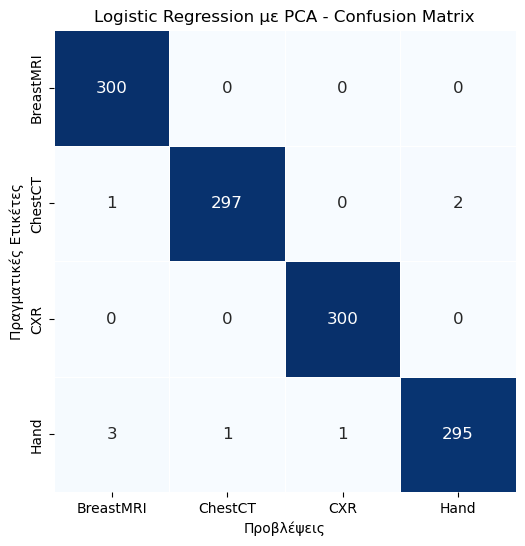

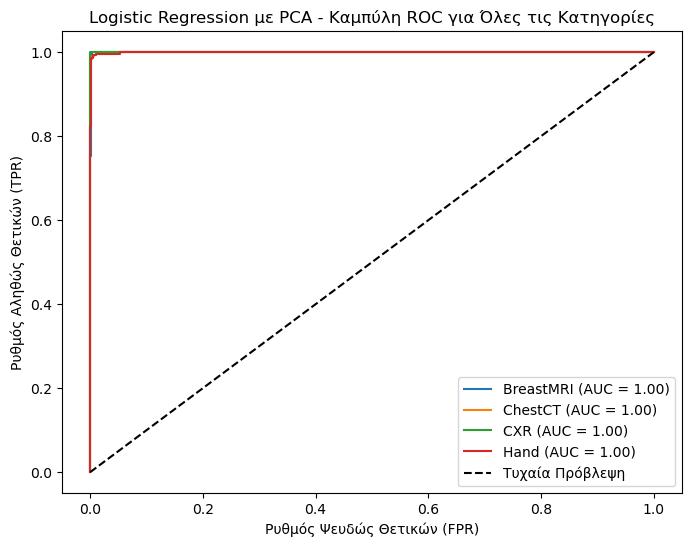

In [41]:
def plot_confusion_matrix(cm, class_labels, title="Confusion Matrix"):
    """
    Εμφανίζει τον Confusion Matrix χωρίς τις διαχωριστικές γραμμές.
    
    Παράμετροι:
        cm: Confusion Matrix
        class_labels: Λίστα ετικετών κατηγοριών
        title: Τίτλος του γραφήματος
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels,
                cbar=False, square=True, annot_kws={"size": 12}, linewidths=0.5, linecolor='white')  # Το 'linewidths=0.5' αφαιρεί τις γραμμές
    plt.xlabel('Προβλέψεις')
    plt.ylabel('Πραγματικές Ετικέτες')
    plt.title(title)
    plt.show()

def evaluate_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Εκτελεί αξιολόγηση και οπτικοποίηση της απόδοσης ενός εκπαιδευμένου μοντέλου.
    
    Παράμετροι:
        clf: Εκπαιδευμένος ταξινομητής
        X_test: Δεδομένα του test set (χαρακτηριστικά)
        y_test: Πραγματικές ετικέτες του test set
        class_labels: Λίστα ετικετών κατηγοριών (προαιρετικό)
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # Δημιουργία προβλέψεων με το μοντέλο
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Υπολογισμός και εμφάνιση του (Confusion Matrix)
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion  Matrix:\n", cm)
    plot_confusion_matrix(cm, class_names, title=f"{title_prefix} - Confusion Matrix")

    # Υπολογισμός και εμφάνιση καμπύλης ROC 
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        # Μετατροπή σε δυαδική μορφή για κάθε κατηγορία 
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])  # Υπολογισμός των FPR και TPR
            roc_auc = auc(fpr, tpr)  # Υπολογισμός του AUC
            plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Τυχαία Πρόβλεψη')  # Προσθήκη της γραμμής της τυχαίας πρόβλεψης
        plt.xlabel('Ρυθμός Ψευδώς Θετικών (FPR)')
        plt.ylabel('Ρυθμός Αληθώς Θετικών (TPR)')
        plt.title(f'{title_prefix} - Καμπύλη ROC για Όλες τις Κατηγορίες')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Η καμπύλη ROC και το AUC δεν είναι διαθέσιμα για αυτόν τον ταξινομητή.")

# Αξιολόγηση της απόδοσης του ταξινομητή Logistic Regression με PCA
evaluate_model_performance(clf, X_test_pca, y_test, class_labels=np.unique(y_train), title_prefix="Logistic Regression με PCA")

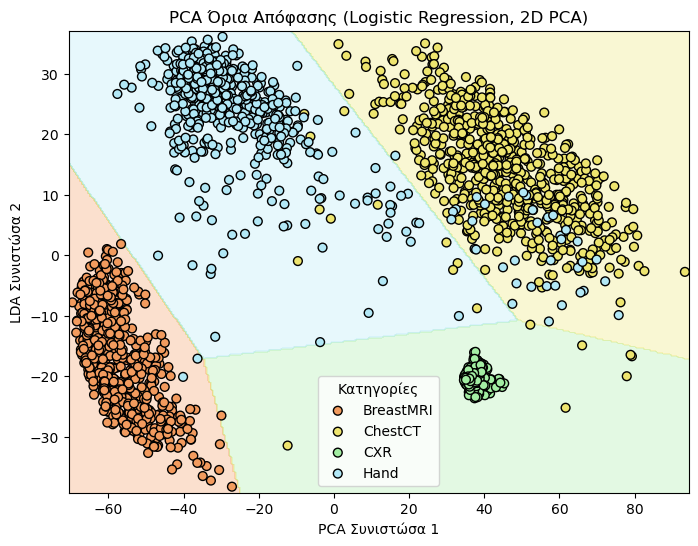

In [42]:
# Ονόματα των κατηγοριών (π.χ., για το BreastMRI, ChestCT κ.λπ.)
class_names = ['BreastMRI', 'ChestCT', 'CXR', 'Hand']

# Δημιουργία του χρωματικού χάρτη
colors = ["#F29B5E", "#EEE56F", "#A3EEA3", "#B2E8F6"]
custom_cmap = ListedColormap(colors)

# Μειώνουμε τις διαστάσεις των δεδομένων σε 2D για να τα οπτικοποιήσουμε
X_train_2d = X_train_pca[:, :2]  # Επιλέγουμε τις πρώτες δύο συνιστώσες για τα δεδομένα εκπαίδευσης
X_test_2d = X_test_pca[:, :2]  # Επιλέγουμε τις πρώτες δύο συνιστώσες για τα δεδομένα δοκιμής

# Εκπαιδεύουμε ξανά τον ταξινομητή Logistic Regression με τα δεδομένα σε 2D για να απεικονίσουμε το όριο απόφασης
clf_2d = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
clf_2d.fit(X_train_2d, y_train)

# Δημιουργούμε ένα πλέγμα για να σχεδιάσουμε το όριο απόφασης
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1  # Ορίζουμε το εύρος για τον άξονα x
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1  # Ορίζουμε το εύρος για τον άξονα y
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))  # Δημιουργούμε το πλέγμα

# Προβλέπουμε τις κατηγορίες για κάθε σημείο του πλέγματος
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Αντιστοίχιση προβλέψεων σε ακέραιες τιμές
class_labels, Z_int = np.unique(y_train, return_inverse=True)
label_to_int = {label: idx for idx, label in enumerate(class_labels)}
Z_int = np.array([label_to_int[label] for label in Z])
Z_int = Z_int.reshape(xx.shape)

# Οπτικοποίηση των ορίων απόφασης του KNN
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=custom_cmap)
plt.contour(xx, yy, Z_int, colors='none')

# Σχεδίαση των σημείων εκπαίδευσης με τα ονόματα των κατηγοριών στο υπομνημα
handles = []  # Για να κρατήσουμε τα handles των κατηγοριών για το υπομνημα

for i, class_label in enumerate(class_names):  # Χρησιμοποιούμε τα ονόματα των κατηγοριών εδώ
    idx = np.where(y_train == i)
    scatter = plt.scatter(X_train_2d[idx, 0], X_train_2d[idx, 1],
                label=f'{class_label}',  # Εδώ εμφανίζονται τα ονόματα
                edgecolor='k', s=40,
                c=[custom_cmap(i)] * len(idx[0]))

    # Προσθήκη των σημείων στο handle για το υπομνημα
    handles.append(scatter)

# Ρυθμίσεις γραφήματος
plt.xlabel('PCA Συνιστώσα 1')
plt.ylabel('LDA Συνιστώσα 2')
plt.title('PCA Όρια Απόφασης (Logistic Regression, 2D PCA)')
plt.grid(False)

# Προσθήκη του υπομνήματος με τα ονόματα των κατηγοριών
plt.legend(handles=handles, title="Κατηγορίες", loc='best')

plt.show()

In [46]:
# Grid search για τις καλύτερες υπερπαραμέτρους με Logistic Regression και PCA features

# Ορίζουμε το parameter grid
param_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'saga', 'liblinear'],  # Επιλογή solvers για Logistic Regression
    'penalty': ['l2'],  # Επιλογή penalty για Logistic Regression
    'max_iter': [1000, 2500, 5000]
}

# Initialize Logistic Regression 
logreg = LogisticRegression()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit on PCA-reduced training data
grid_search.fit(X_train_pca, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_pca)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters found: {'C': np.float64(0.23357214690901212), 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score: 0.9939279323527139
Test Accuracy: 0.9933333333333333

Logistic Regression Classification Report:
               precision    recall  f1-score   support

   BreastMRI       1.00      1.00      1.00       300
     ChestCT       0.99      0.99      0.99       300
         CXR       0.99      1.00      1.00       300
        Hand       0.99      0.99      0.99       300

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200



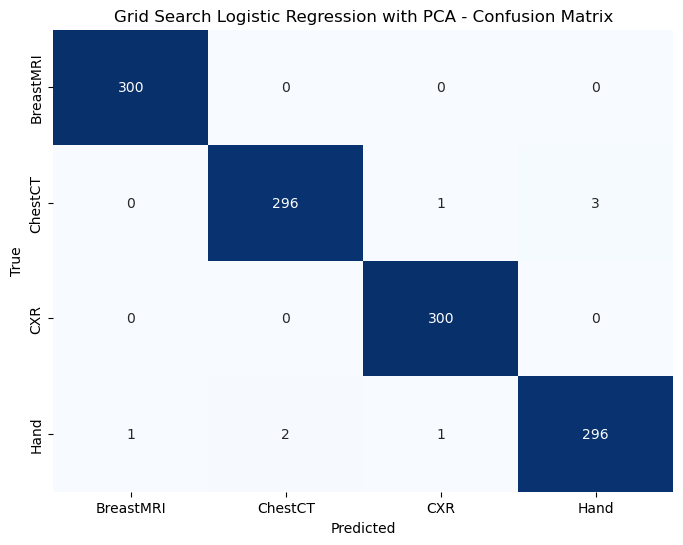

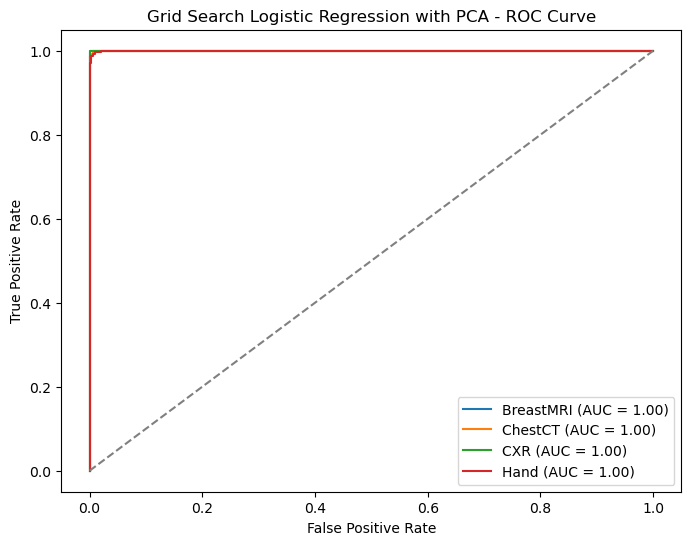

In [47]:
def assess_model_performance(model, X_test, y_test, class_names, title_prefix=""):
    """
    Εκτελεί αξιολόγηση του μοντέλου και εμφανίζει τον Confusion Matrix και την ROC Curve.
    
    Παράμετροι:
        model: Το εκπαιδευμένο μοντέλο
        X_test: Δεδομένα του test set
        y_test: Πραγματικές ετικέτες του test set
        class_names: Λίστα με τα ονόματα των κατηγοριών
        title_prefix: Πρόθεμα τίτλου για τα γραφήματα (προαιρετικό)
    """
    # 1. Εμφάνιση του Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Οπτικοποίηση του Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
    plt.title(f'{title_prefix} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # 2. Εμφάνιση του ROC Curve για κάθε κατηγορία (αν multi-class)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_prob = model.predict_proba(X_test)

    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')  # Χρησιμοποιούμε τα ονόματα των κατηγοριών

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'{title_prefix} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Εφαρμογή της συνάρτησης στο μοντέλο που έχουμε εκπαιδεύσει
assess_model_performance(grid_search.best_estimator_, X_test_pca, y_test, class_names=['BreastMRI', 'ChestCT', 'CXR', 'Hand'], title_prefix="Grid Search Logistic Regression with PCA")